In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
dataset = pd.read_csv('/content/drive/My Drive/IRIS.csv')


In [18]:
ds=dataset

### Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

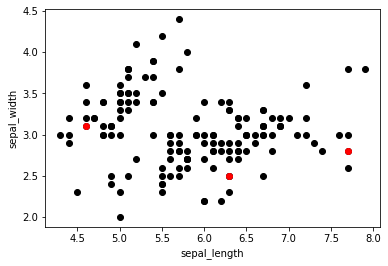

In [19]:
#number of clusters
K=3
# Select random observation as centroids
Centroids = (ds.sample(n=K))
plt.scatter(ds["sepal_length"],ds["sepal_width"],c='black')
plt.scatter(Centroids["sepal_length"],Centroids["sepal_width"],c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

### Step 3 - Assign all the points to the closest cluster centroid
### Step 4 - Recompute centroids of newly formed clusters
### Step 5 - Repeat step 3 and 4

In [20]:
diff = 1
j=0

while(diff!=0):
    XD=ds
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["sepal_length"]-row_d["sepal_length"])**2
            d2=(row_c["sepal_width"]-row_d["sepal_width"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        ds[i]=ED
        i=i+1

    C=[]
    for index,row in ds.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    ds["Cluster"]=C
    Centroids_new = ds.groupby(["Cluster"]).mean()[["sepal_length","sepal_width"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['sepal_length'] - Centroids['sepal_length']).sum() + (Centroids_new['sepal_width'] - Centroids['sepal_width']).sum()
        print(diff.sum())
    Centroids = ds.groupby(["Cluster"]).mean()[["sepal_length","sepal_width"]]

-0.21465805293253482
-0.27465551676078226
-0.0671374303378598
-0.06587006395995632
-0.00535107931118084
-0.09012514683292716
-0.05495492449853501
-0.05770208567395496
-0.025976611108189385
-0.053966876810870534
-0.006053958270940463
-0.03355142599045191
-0.03095307744276532
-0.058061021665672286
-0.0029027576197382388
-0.0016218921046897705
-0.02893719806763384
0.0


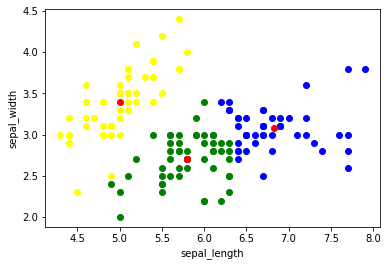

In [21]:
color=['blue','green','yellow']
for k in range(K):
    data=ds[ds["Cluster"]==k+1]
    plt.scatter(data["sepal_length"],data["sepal_width"],c=color[k])
plt.scatter(Centroids["sepal_length"],Centroids["sepal_width"],c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

##Testing the k-means model

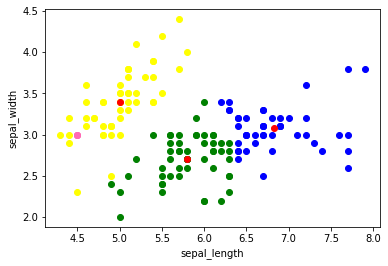

In [23]:
color=['blue','green','yellow']
for k in range(K):
    data=ds[ds["Cluster"]==k+1]
    plt.scatter(4.5,3.0,c="hotpink")
    plt.scatter(data["sepal_length"],data["sepal_width"],c=color[k])
plt.scatter(Centroids["sepal_length"],Centroids["sepal_width"],c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

#####ANALYSIS: If we randomly chose x(sepal_length)=4.5,y(sepal_width)=3 then it will belong to the yellow cluster.

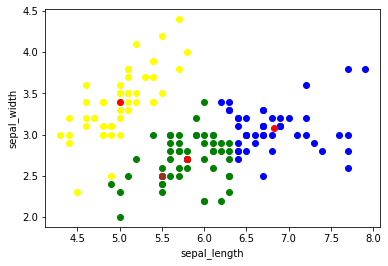

In [24]:
color=['blue','green','yellow']
for k in range(K):
    data=ds[ds["Cluster"]==k+1]
    plt.scatter(5.5,2.5,c="brown")
    plt.scatter(data["sepal_length"],data["sepal_width"],c=color[k])
plt.scatter(Centroids["sepal_length"],Centroids["sepal_width"],c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

#####ANALYSIS: If we randomly chose x(sepal_length)=5.5,y(sepal_width)=2.5 then it will belong to the green cluster.

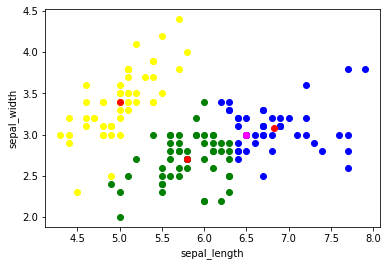

In [25]:
color=['blue','green','yellow']
for k in range(K):
    data=ds[ds["Cluster"]==k+1]
    plt.scatter(6.5,3.0,c="magenta")
    plt.scatter(data["sepal_length"],data["sepal_width"],c=color[k])
plt.scatter(Centroids["sepal_length"],Centroids["sepal_width"],c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

#####ANALYSIS: If we randomly chose x(sepal_length)=5.5,y(sepal_width)=2.5 then it will belong to the blue cluster.